# spaCy

spaCy is a free and open-source library for NLP in Python, which is designed to simplify building systems for information extraction. spaCy provides production-ready code widely used for NLP use cases. It supports 64+ languages. It is robust, fast and has built-in visualizers for various NLP functionalities.

In [1]:
# import required libraries
import spacy

#### en_core_web_sm

<b>en_core_web_sm</b> is a pre-trained small English language model provided by spaCy. It is designed to support tasks like part-of-speech tagging, dependency parsing, named entity recognition (NER), and tokenization in English text.

It can be installed with following command

*python -m spacy download en_core_web_sm*

In [2]:
# load en_core_web_sm for further processing
# Let us run spaCy nlp pipeline for text processing which returns a language object
nlp = spacy.load("en_core_web_sm")

In [3]:
type(nlp)

spacy.lang.en.English

In [4]:
# let us process a sample string with spaCy

text = 'We are learning spaCy for Natural Language Processing'
doc = nlp(text)

In [5]:
type(doc)

spacy.tokens.doc.Doc

#### As we see above, nlp object converts the text ino a Doc object(container) which contains tokens, linguistic annotations, relationships, etc of the processes text 

In [6]:
doc.text

'We are learning spaCy for Natural Language Processing'

#### Tokenization

In [7]:
# Let us look at the tokens created
print([token.text for token in doc])

['We', 'are', 'learning', 'spaCy', 'for', 'Natural', 'Language', 'Processing']


#### Sentence Segmentation

In [8]:
doc =  nlp('We are learning NLP. We are getting introduced to spaCy.')

print([sent.text for sent in doc.sents])

['We are learning NLP.', 'We are getting introduced to spaCy.']


In [9]:
# print sentence and length of each sentence

doc =  nlp('We are learning NLP. We are getting introduced to spaCy.')

for sent in doc.sents:
    print('Sentence is "{0}" with length {1}'.format(sent.text,len(sent)))

Sentence is "We are learning NLP." with length 5
Sentence is "We are getting introduced to spaCy." with length 7


#### Lemmatization

In [10]:
doc = nlp('We are learning NLP')

for token in doc:
    print('Token: ',token.text,' Lemma: ', token.lemma_)

Token:  We  Lemma:  we
Token:  are  Lemma:  be
Token:  learning  Lemma:  learn
Token:  NLP  Lemma:  NLP


#### POS(part of speech) tagging with spaCy

POS tags depend on the context, surrounding words and their tags

In [11]:
# let us see another complex example to see how POS tagging is done on the context

for token in nlp('My cat will fish for a fish tomorrow in a fishy way.'):
    print('Token: {0}, POS: {1}, POS Explaination: {2}'.format(token.text, token.pos_,spacy.explain(token.pos_)))

Token: My, POS: PRON, POS Explaination: pronoun
Token: cat, POS: NOUN, POS Explaination: noun
Token: will, POS: AUX, POS Explaination: auxiliary
Token: fish, POS: VERB, POS Explaination: verb
Token: for, POS: ADP, POS Explaination: adposition
Token: a, POS: DET, POS Explaination: determiner
Token: fish, POS: NOUN, POS Explaination: noun
Token: tomorrow, POS: NOUN, POS Explaination: noun
Token: in, POS: ADP, POS Explaination: adposition
Token: a, POS: DET, POS Explaination: determiner
Token: fishy, POS: ADJ, POS Explaination: adjective
Token: way, POS: NOUN, POS Explaination: noun
Token: ., POS: PUNCT, POS Explaination: punctuation


In [12]:
# Let us see another example to see the difference in POS tagging for the word watch in different context
verb_sent = 'I watch TV.'

for token in nlp(verb_sent):
    print('Token: {0}, POS: {1}, POS Explaination: {2}'.format(token.text, token.pos_, spacy.explain(token.pos_)))

Token: I, POS: PRON, POS Explaination: pronoun
Token: watch, POS: VERB, POS Explaination: verb
Token: TV, POS: NOUN, POS Explaination: noun
Token: ., POS: PUNCT, POS Explaination: punctuation


In [13]:
# let us compare above processing with a sentence which has watch as noun
noun_sent = 'I left without my watch.'

for token in nlp(noun_sent):
    print('Token: {0}, POS: {1}, POS Explaination: {2}'.format(token.text, token.pos_, spacy.explain(token.pos_)))

Token: I, POS: PRON, POS Explaination: pronoun
Token: left, POS: VERB, POS Explaination: verb
Token: without, POS: ADP, POS Explaination: adposition
Token: my, POS: PRON, POS Explaination: pronoun
Token: watch, POS: NOUN, POS Explaination: noun
Token: ., POS: PUNCT, POS Explaination: punctuation


#### Importance of POS

- Many applications need to know the word type for better accuracy. For example, in transalation systems, the word fish as a verb and as a noun will map to different words in Spanish

- Syntactic information such as POS tags can help many tasks further down the pipeline such as <b>word-sense disambiguation (WSD)</b>. WSD is a classical problem of deciding in which sense a word is used in a sentence. Determining the sense of the word can be crucial in search engines, machine translation, and question-answering systems. For example, for the word "Play", the POS tagger can help with WSD when the tagger labels the senses of word with a NOUN or VERB depending on its context.

#### Named Entity Recognition(NER)

In [14]:
doc = nlp('Albert Einstein was genius')

for ent in doc.ents:
    print('Text {0} is {1} with start position {2} and end position {3}'.format(ent.text, ent.label_, ent.start_char, ent.end_char))

Text Albert Einstein is PERSON with start position 0 and end position 15


In [15]:
doc = nlp('Taj Mahal is in Agra')

for ent in doc.ents:
    print('Text {0} is {1} with start position {2} and end position {3}'.format(ent.text, ent.label_, ent.start_char, ent.end_char))

Text Taj Mahal is PERSON with start position 0 and end position 9
Text Agra is GPE with start position 16 and end position 20


So sometimes spacy NER fails to detect correctly as we saw

In [16]:
doc = nlp('Taj Mahal is in agra')

for ent in doc.ents:
    print('Text {0} is {1} with start position {2} and end position {3}'.format(ent.text, ent.label_, ent.start_char, ent.end_char))

Text Taj Mahal is PERSON with start position 0 and end position 9


Also, if written in small letters it does not detect correctly

Alternative way of accessing entity types is from the token of doc object

In [17]:
doc = nlp('Albert Einstein was genius')

for token in doc:
    print('Token {0} is of type {1}'.format(token.text, token.ent_type_))

Token Albert is of type PERSON
Token Einstein is of type PERSON
Token was is of type 
Token genius is of type 


For tokens which are not recognized as entity, will give empty value for token.ent_type_

### displaCy

spaCy is equipped with a modern visualizer <b>displaCy</b>. The displaCy entity visualizer highlights named entities and their labels

In [18]:
from spacy import displacy

doc = nlp('Albert Einstein was genius')

# displacy.serve(doc, style='ent', port=5001) Since we are running from local system server, this is not required
displacy.render(doc, style='ent')

### Dependency Parsing

POS tags gives the grammatical categories of words but does not reveal any relation between distant words in a given sentence.

Dependency parsing helps bridge that gap. This process provides a structured way of exploring the sentence syntax. It is analyzing sentence structure via dependencies between tokens. A dependency or a dependency relation is a directed link between two tokens. The result of this procedure is always a tree. 

In [19]:
# Let us draw a dependency tree using displaCy

doc = nlp('We understand the differences.')

for token in doc:
    print('Token: {0}, Token Dependency: {1}, Dependency Explaination: {2}'.format(token.text, token.dep_, spacy.explain(token.dep_)))

Token: We, Token Dependency: nsubj, Dependency Explaination: nominal subject
Token: understand, Token Dependency: ROOT, Dependency Explaination: root
Token: the, Token Dependency: det, Dependency Explaination: determiner
Token: differences, Token Dependency: dobj, Dependency Explaination: direct object
Token: ., Token Dependency: punct, Dependency Explaination: punctuation


In [20]:
displacy.render(doc, style='dep')

### Word Vectors

Word vectors, or word embeddings, are numerical representations of words that allow computers to perform complex tasks using text data. Word vectors are a part of many spaCy models, however, a few of the models do not have word vectors like en_core_web_sm

We have word vectors in en_core_web_md (the medium model) which has 300-dimensional vectors for 20,000 words.

In [21]:
# nlp since is loaded with en_core_web_sm, it does not have any vector
print(nlp.meta['vectors'])

{'width': 0, 'vectors': 0, 'keys': 0, 'name': None, 'mode': 'default'}


In [22]:
# let us load now en_core_web_md and check the vectors
nlp_md = spacy.load('en_core_web_md')
print(nlp_md.meta['vectors'])

{'width': 300, 'vectors': 20000, 'keys': 684830, 'name': 'en_vectors', 'mode': 'default'}


The purpose of word vectors is to allow a computer to understand words. Now let us see how to extract the word vectors for a sample word.

- nlp_md.vocab: to access the vocabulary (Vocab class)
- nlp_md.vocab.strings: to access word IDs in a vocabulary
- nlp_md.vocab.vectors: to access word vectors of a model or a word, given its corresponding id

In [23]:
print(type(nlp_md.vocab))

<class 'spacy.vocab.Vocab'>


In [24]:
like_id = nlp_md.vocab.strings['like']
print(like_id)

18194338103975822726


In [25]:
print(nlp_md.vocab.vectors[like_id])

[-6.1052e-01  1.1656e-01 -5.0648e-01 -3.2216e-01 -9.9742e-02  1.0182e-01
  3.1042e-01 -1.8155e-01  3.1774e-01  2.1537e+00 -8.1129e-02 -3.8734e-01
  6.8008e-02 -5.8029e-03 -5.3814e-01 -9.8787e-02 -8.4160e-02  3.1755e-02
 -2.9811e-01  5.0496e-01  4.1719e-01  1.1462e-01  2.5330e-01 -1.6668e-01
  2.6645e-02  4.5709e-02 -5.9685e-01 -3.9645e-01  4.3089e-01  1.3014e-01
 -4.0591e-02  6.6024e-01 -5.3007e-01 -8.1629e-02  3.3484e-01  1.6258e-01
  3.9029e-02  7.2786e-02 -1.8635e-01  3.8104e-01 -5.0557e-01 -3.0910e-02
 -3.2578e-01  3.8818e-01  1.4605e-01  3.8982e-02 -1.4992e-01  6.0316e-01
 -3.0801e-02  1.3456e-01 -6.2982e-01  5.8746e-02  1.5878e-02 -7.8831e-02
  1.4754e-01  5.2191e-02 -4.3654e-01 -1.6707e-01 -1.5184e-02 -1.6073e-01
 -2.1243e-02  8.3719e-02 -6.5062e-01 -7.9566e-02 -4.5479e-02 -1.0070e-01
 -1.4044e-01 -4.1403e-02  1.2033e-01  2.6015e-03  1.0318e-02  1.2444e-01
  3.0785e-01 -2.4270e-01  4.9056e-02  2.1891e-01  1.5346e-01  1.6682e-01
  5.0732e-01  5.9128e-01 -3.0452e-01 -5.8077e-02  1

### Word Vectors Visualization

We can visualize word vectors in a scatter plot to help us understand how the vocabulary words are grouped. 

In [26]:
# import required libraries

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [27]:
# let take few sample words to create their word vector visualization
words = ['wonderful','horrible',
        'apple', 'banana', 'orange', 'watermelon',
        'dog', 'cat']

In [28]:
# let us now create word vectors for these words and stack them vertically
word_vectors = np.vstack([nlp_md.vocab.vectors[nlp_md.vocab.strings[word]] for word in words])

In [29]:
word_vectors

array([[-0.76677 ,  0.52154 ,  0.51221 , ...,  0.39398 ,  0.30883 ,
        -0.20862 ],
       [-0.71302 ,  0.090462,  0.36503 , ..., -0.088974, -0.050381,
        -0.052622],
       [-0.6334  ,  0.18981 , -0.53544 , ..., -1.1784  ,  0.25504 ,
         0.61171 ],
       ...,
       [-0.6334  ,  0.18981 , -0.53544 , ..., -1.1784  ,  0.25504 ,
         0.61171 ],
       [-0.72483 ,  0.42538 ,  0.025489, ...,  0.050317, -0.23159 ,
         0.28165 ],
       [-0.72483 ,  0.42538 ,  0.025489, ...,  0.050317, -0.23159 ,
         0.28165 ]], dtype=float32)

Since the word vectors here are 300 dimensions, in order to visualize word vectors, we need to project them into a two-dimensional space. We can project vectors by extracting the two principal components via <b>Principal Component Analysis (PCA)</b>. It is a way to reduce a high-dimensional dataset into a dataset of fewer dimensions (two in this case)

In [30]:
pca = PCA(n_components=2)
word_vectors_transformed = pca.fit_transform(word_vectors)

In [31]:
type(word_vectors_transformed)

numpy.ndarray

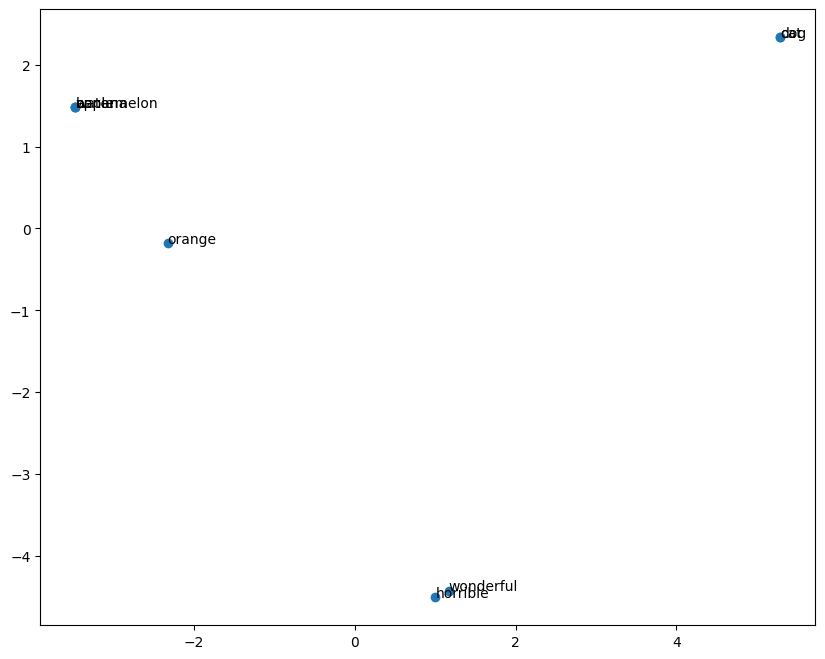

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(word_vectors_transformed[:,0],word_vectors_transformed[:,1])

for word, coord in zip(words, word_vectors_transformed):
    x,y = coord
    plt.text(x,y, word, size=10)

plt.show()

### Similar words in a vocabulary

spaCy can help find semantically similar terms to a given term

In [33]:
word = "computer"

word_vector = nlp_md.vocab.vectors[nlp_md.vocab.strings[word]]

most_similar_words = nlp_md.vocab.vectors.most_similar(np.asarray([word_vector]), n=5)

In [34]:
words = [nlp_md.vocab.strings[w] for w in most_similar_words[0][0]]
print(words)

['CONNECTING', 'Paths', 'CONFIGURATION', 'architectural', 'SIGNAGE']


### Semantic Similarity

It is the process of analyzing multiple sentences to identify similarities between them. Determining semantic similarity can help us to categorize texts into predefined categories or detect relevant texts, or to flag duplicate content.


<b>Similarity score</b>

Semantic similarity score is a metric that is defined over texts, where the similarity between two texts is measured using their representative word vectors. 

We will use cosine similarity and word vectors to measure similarity between two pieces of text. The cosine similarity of two vectors is the cosine of the angle that's created by these two vectors, and it will always have a number between 0 and 1. A larger cosine similarity metric (closer to one) represents more similar word vectors.

In [40]:
# let us see an example

doc1 = nlp_md('We eat pizza')
doc2 = nlp_md('We like to eat pasta')

token1 = doc1[2]
token2 = doc2[4]

print(type(token1))
print(type(token2))

print('Similarity between "{0}" and "{1}" = '.format(token1,token2), round(token1.similarity(token2),3))

<class 'spacy.tokens.token.Token'>
<class 'spacy.tokens.token.Token'>
Similarity between "pizza" and "pasta" =  1.0


#### Span Similarity

Span is a slice from a Doc container. Subsetting a Doc container results in a Span object. Similar to the Token class, the Span class also has a span.similarity() method that can be used to calculate the similarity score between two spans. 

In [41]:
doc1 = nlp_md('We eat pizza')
doc2 = nlp_md('We like to eat pasta')

span1 = doc1[1:]
span2 = doc2[1:]

print(type(span1))
print(type(span2))

print('Similarity between "{0}" and "{1}" = '.format(span1,span2), round(span1.similarity(span2),3))

<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
Similarity between "eat pizza" and "like to eat pasta" =  0.883


In [42]:
# let us check another span

span1 = doc1[1:]
span2 = doc2[3:]

print(type(span1))
print(type(span2))

print('Similarity between "{0}" and "{1}" = '.format(span1,span2), round(span1.similarity(span2),3))

<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
Similarity between "eat pizza" and "eat pasta" =  1.0


#### Doc Similarity

We can also determine whether two documents are similar using spaCy. 

In [44]:
doc1 = nlp_md('We eat pizza')
doc2 = nlp_md('We like to eat pasta')

print('Similarity score: ',round(doc1.similarity(doc2),3))

Similarity score:  0.927


#### Sentence Similarity

we can use spaCy to find relevant sentences to a given keyword.

In [49]:
sentences = nlp_md("What is the cheapest flight from Bangalore to Ireland? Which airline serves Canada, Ireland and Australia? What kinds of planes are used by American Airlines?")

keyword = nlp_md('price')

for i, sentence in enumerate(sentences.sents):
    print('Similarity score with sentence {{0}} : {1}'.format(i+1,round(sentence.similarity(keyword),5)))

Similarity score with sentence {0} : 0.5937
Similarity score with sentence {0} : 0.44182
Similarity score with sentence {0} : 0.37389
